In [1]:
HEAD_PATH = "/home/jackie/Downloads/dataset"

In [2]:
import warnings
 
warnings.filterwarnings('ignore')

- path of data

- Welcome to Quantitative and High Frequency Trading Training Program
- Let's start with basic data analysis with python
- you can use Shift+Enter to run each line of code

- path of our program

In [3]:
DATA_PATH = HEAD_PATH + "/"

- set working directory

In [4]:
import os
os.chdir(DATA_PATH)

- number of cores

In [5]:
import os

import multiprocessing

# Linux
CORE_NUM = multiprocessing.cpu_count()
CORE_NUM

# Windows
# CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
# CORE_NUM

20


- get working directory

In [6]:
os.getcwd()

'/home/jackie/Downloads/dataset'

- sample product, you can change to your specific product symbol
- for this quarter we analyze all of the black medals

In [7]:
product_list = ["cu", "zn", "ni", "ag", "au"]
product = product_list[0]

- directory of the product's data

In [8]:
dire = DATA_PATH + product
dire

'/home/jackie/Downloads/dataset/cu'

- get all available data

In [9]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
all_dates.sort(key = lambda x:int(x[:-4]))
len(all_dates)
## 1398

1071

- we can see that there are 974 days
- all of the products have the same trading days
- so we just take a as an example
- get first several dates

In [10]:
all_dates[:6]

# ['20170703.pkl',
#  '20170704.pkl',
#  '20170705.pkl',
#  '20170706.pkl',
#  '20170707.pkl',
#  '20170710.pkl']

['20170703.pkl',
 '20170704.pkl',
 '20170705.pkl',
 '20170706.pkl',
 '20170707.pkl',
 '20170710.pkl']

- get last several dates

In [11]:
all_dates[-6:]

# ['20211118.pkl',
#  '20211119.pkl',
#  '20211122.pkl',
#  '20211123.pkl',
#  '20211124.pkl',
#  '20211125.pkl']

['20211118.pkl',
 '20211119.pkl',
 '20211122.pkl',
 '20211123.pkl',
 '20211124.pkl',
 '20211125.pkl']

- specify a date

In [12]:
date = "20180411"

- loading data set

In [13]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

- get the column names of data

In [14]:
data.columns
## contract: contract name, product+expiration date
## date.time: date and time
## price: newest price of data
## cum.open.int: cumulative open interest
## open.int: newest open interest increment
## turnover: newest turnover increment
## qty: newest trading volume
## bid: bid price
## ask: ask price
## bid.qty: bid size
## ask.qty: ask size
## date: actual date
## time: acutal time
## milli: actual milli second
## mid.price: middle price of bid and ask
## buy.trade: active buy volume at level 1
## buy2.trade: active buy volume at other levels
## sell.trade: active sell volume at level 1
## sell2.trade: active sell volume at other levels
## log.price: log wpr (to be defined soon)
## ret: log return of last tick
## wpr: volume weighted price
## wpr.ret: price change of wpr
## high: highest price of last ask, last price, and this ask
## low: lowest price of last bid, last price, and thsi bid
## next.bid: estimated active sell price, used for backtesting
## next.ask: estimated active buy price, used for backtesting
## min.1024: rolling minimum of wpr over 1024 ticks
## max.1024: rolling maximum of wpr over 1024 ticks
## min.2048: rolling minimum of wpr over 2048 ticks
## max.2048: rolling maximum of wpr over 2048 ticks
## min.4096: rolling minimum of wpr over 4096 ticks
## max.4096: rolling maximum of wpr over 4096 ticks

## Q：关于这个数据的每个 column 的含义，能否介绍一下？一些缩写我不太了解什么含义？
## A：各名称含义如下：
## contract: 合约的名字，如 rb1605，表示螺纹钢合约，2016 年 5 月到期；
## date.time: 日期和时间合在一起，方便作图用；
## price: 最新的成交价；
## cum.open.int: 总的持仓量；
## open.int: 最新的持仓量改变量
## turnover: 最新的成交额；
## qty: 最新的成交量；
## bid: 买一价；
## ask: 卖一价；
## bid.qty: 买一量；
## ask.qty: 卖一量；
## date: 实际日期；
## time: 实际时间；
## milli: 毫秒数（上期所与中金所是 0、500，大商所随机，郑商所是 0）；
## mid.price: 买一和卖一的中间价；
## buy.trade: 一档主动买量（估算，非交易所提供）；
## buy2.trade: 其他价位主动买量（估算，非交易所提供）；
## sell.trade: 一档主动卖量（估算，非交易所提供）；
## sell2.trade: 其他价位主动买量（估算，非交易所提供）；
## log.price: wpr 的对数（wpr 下面定义）；
## ret: 最新一笔行情的对数收益率；
## wpr: 挂单量加权平均价；
## wpr.ret: wpr 的价格变化；
## min.1024: 过去 1024 笔行情的 wpr 最小值
## max.1024: 过去 1024 笔行情的 wpr 最大值；
## high: 当前 ask、前一个 ask、最新价的最高价（构造最小级别 K 线用）；
## low: 当前 bid、前一个 bid、最新价的最低价（狗仔最小级别 K 线用）；
## next.bid: 主动卖单的成交价（估算，非交易所提供），用于回测；
## next.ask: 主动买单的成交价（估算，非交易所提供），用于回测；
## min.1024: 1024跳滚动最低价
## max.1024: 1024跳滚动最高价
## min.2048: 2048跳滚动最低价
## max.2048: 2048跳滚动最高价
## min.4096: 4096滚动最低价
## max.4096: 4096滚动最高价

Index(['contract', 'date.time', 'price', 'cum.open.int', 'open.int',
       'turnover', 'qty', 'bid', 'ask', 'bid.qty', 'ask.qty', 'date', 'time',
       'milli', 'good', 'min.1024', 'max.1024', 'min.2048', 'max.2048',
       'min.4096', 'max.4096', 'mid.price', 'buy.trade', 'buy2.trade',
       'sell.trade', 'sell2.trade', 'log.price', 'ret', 'wpr', 'wpr.ret',
       'next.ask', 'next.bid'],
      dtype='object')

In [15]:
data.iloc[0:10,0:10]

#  	contract 	date.time 	price 	cum.open.int 	open.int 	turnover 	qty 	bid 	ask 	bid.qty
# 0 	cu1806 	2018-04-10 20:59:00.500 	51400.0 	236692 	96 	62708000.0 	244 	51390.0 	51400.0 	1
# 1 	cu1806 	2018-04-10 21:00:00.500 	51380.0 	236718 	26 	11819400.0 	46 	51380.0 	51390.0 	2
# 2 	cu1806 	2018-04-10 21:00:01.000 	51420.0 	236742 	24 	33916100.0 	132 	51410.0 	51420.0 	2
# 3 	cu1806 	2018-04-10 21:00:01.500 	51410.0 	236748 	6 	9253800.0 	36 	51400.0 	51410.0 	5
# 4 	cu1806 	2018-04-10 21:00:02.000 	51410.0 	236740 	-8 	22107900.0 	86 	51410.0 	51420.0 	11
# 5 	cu1806 	2018-04-10 21:00:02.500 	51410.0 	236752 	12 	12338200.0 	48 	51400.0 	51410.0 	6
# 6 	cu1806 	2018-04-10 21:00:03.000 	51400.0 	236766 	14 	7710000.0 	30 	51390.0 	51400.0 	23
# 7 	cu1806 	2018-04-10 21:00:03.500 	51390.0 	236794 	28 	24670300.0 	96 	51390.0 	51400.0 	12
# 8 	cu1806 	2018-04-10 21:00:04.000 	51410.0 	236760 	-34 	21586900.0 	84 	51400.0 	51410.0 	14
# 9 	cu1806 	2018-04-10 21:00:04.500 	51410.0 	236746 	-14 	21076200.0 	82 	51400.0 	51410.0 	5

,contract,date.time,price,cum.open.int,open.int,turnover,qty,bid,ask,bid.qty
0,cu1806,2018-04-10 20:59:00.500,51400.0,236692,96,62708000.0,244,51390.0,51400.0,1
1,cu1806,2018-04-10 21:00:00.500,51380.0,236718,26,11819400.0,46,51380.0,51390.0,2
2,cu1806,2018-04-10 21:00:01.000,51420.0,236742,24,33916100.0,132,51410.0,51420.0,2
3,cu1806,2018-04-10 21:00:01.500,51410.0,236748,6,9253800.0,36,51400.0,51410.0,5
4,cu1806,2018-04-10 21:00:02.000,51410.0,236740,-8,22107900.0,86,51410.0,51420.0,11
5,cu1806,2018-04-10 21:00:02.500,51410.0,236752,12,12338200.0,48,51400.0,51410.0,6
6,cu1806,2018-04-10 21:00:03.000,51400.0,236766,14,7710000.0,30,51390.0,51400.0,23
7,cu1806,2018-04-10 21:00:03.500,51390.0,236794,28,24670300.0,96,51390.0,51400.0,12
8,cu1806,2018-04-10 21:00:04.000,51410.0,236760,-34,21586900.0,84,51400.0,51410.0,14
9,cu1806,2018-04-10 21:00:04.500,51410.0,236746,-14,21076200.0,82,51400.0,51410.0,5


In [16]:
# ask.qty 	date 	time 	milli 	good 	min.1024 	max.1024 	min.2048 	max.2048 	min.4096
# 0 	1 	20180410 	20:59:00 	500 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 1 	24 	20180410 	21:00:00 	500 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 2 	19 	20180410 	21:00:01 	0 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 3 	7 	20180410 	21:00:01 	500 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 4 	2 	20180410 	21:00:02 	0 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 5 	19 	20180410 	21:00:02 	500 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 6 	16 	20180410 	21:00:03 	0 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 7 	2 	20180410 	21:00:03 	500 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 8 	4 	20180410 	21:00:04 	0 	False 	NaN 	NaN 	NaN 	NaN 	NaN
# 9 	8 	20180410 	21:00:04 	500 	False 	NaN 	NaN 	NaN 	NaN 	NaN

In [17]:
data.iloc[0:10,20:]

#  	max.4096 	mid.price 	buy.trade 	buy2.trade 	sell.trade 	sell2.trade 	log.price 	ret 	wpr 	wpr.ret 	next.ask 	next.bid
# 0 	NaN 	51395.0 	122.0 	0.0 	122.0 	0.0 	10.847296 	0.004387 	51395.000000 	225.000000 	51390.0 	51380.0
# 1 	NaN 	51385.0 	0.0 	0.0 	40.0 	6.0 	10.847019 	-0.000277 	51380.769231 	-14.230769 	51420.0 	51410.0
# 2 	NaN 	51415.0 	106.0 	0.0 	26.0 	0.0 	10.847607 	0.000587 	51410.952381 	30.183150 	51410.0 	51400.0
# 3 	NaN 	51405.0 	0.0 	0.0 	36.0 	0.0 	10.847475 	-0.000132 	51404.166667 	-6.785714 	51420.0 	51410.0
# 4 	NaN 	51415.0 	54.0 	32.0 	0.0 	0.0 	10.847753 	0.000278 	51418.461538 	14.294872 	51410.0 	51400.0
# 5 	NaN 	51405.0 	0.0 	0.0 	44.0 	4.0 	10.847440 	-0.000312 	51402.400000 	-16.061538 	51400.0 	51390.0
# 6 	NaN 	51395.0 	0.0 	0.0 	30.0 	0.0 	10.847314 	-0.000127 	51395.897436 	-6.502564 	51400.0 	51390.0
# 7 	NaN 	51395.0 	62.0 	0.0 	34.0 	0.0 	10.847366 	0.000052 	51398.571429 	2.673993 	51410.0 	51400.0
# 8 	NaN 	51405.0 	62.0 	0.0 	22.0 	0.0 	10.847545 	0.000179 	51407.777778 	9.206349 	51410.0 	51400.0
# 9 	NaN 	51405.0 	44.0 	0.0 	38.0 	0.0 	10.847468 	-0.000076 	51403.846154 	-3.931624 	51410.0 	51390.0

,max.4096,mid.price,buy.trade,buy2.trade,sell.trade,sell2.trade,log.price,ret,wpr,wpr.ret,next.ask,next.bid
0,51395.000000,51395.0,122.0,0.0,122.0,0.0,10.847296,0.004387,51395.000000,225.000000,51390.0,51380.0
1,51395.000000,51385.0,0.0,0.0,40.0,6.0,10.847019,-0.000277,51380.769231,-14.230769,51420.0,51410.0
2,51410.952381,51415.0,106.0,0.0,26.0,0.0,10.847607,0.000587,51410.952381,30.183150,51410.0,51400.0
3,51410.952381,51405.0,0.0,0.0,36.0,0.0,10.847475,-0.000132,51404.166667,-6.785714,51420.0,51410.0
4,51418.461538,51415.0,54.0,32.0,0.0,0.0,10.847753,0.000278,51418.461538,14.294872,51410.0,51400.0
5,51418.461538,51405.0,0.0,0.0,44.0,4.0,10.847440,-0.000312,51402.400000,-16.061538,51400.0,51390.0
6,51418.461538,51395.0,0.0,0.0,30.0,0.0,10.847314,-0.000127,51395.897436,-6.502564,51400.0,51390.0
7,51418.461538,51395.0,62.0,0.0,34.0,0.0,10.847366,0.000052,51398.571429,2.673993,51410.0,51400.0
8,51418.461538,51405.0,62.0,0.0,22.0,0.0,10.847545,0.000179,51407.777778,9.206349,51410.0,51400.0
9,51418.461538,51405.0,44.0,0.0,38.0,0.0,10.847468,-0.000076,51403.846154,-3.931624,51410.0,51390.0


- plot the price

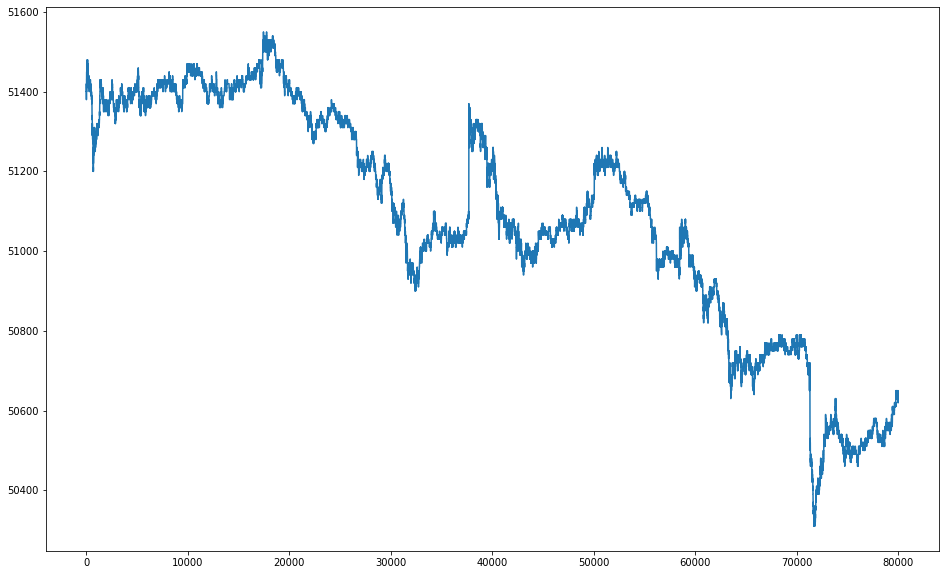

In [18]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["price"].values);

In [19]:
data["time"]

0        20:59:00
1        21:00:00
2        21:00:01
3        21:00:01
4        21:00:02
           ...   
79998    14:59:58
79999    14:59:59
80000    14:59:59
80001    15:00:00
80002    15:00:00
Name: time, Length: 80003, dtype: object

In [20]:
data["time"]<"03:00:00"

0        False
1        False
2        False
3        False
4        False
         ...  
79998    False
79999    False
80000    False
80001    False
80002    False
Name: time, Length: 80003, dtype: bool

In [21]:
 ((data["time"] >="09:00:00")& (data["time"]<"15:15:02"))

0        False
1        False
2        False
3        False
4        False
         ...  
79998     True
79999     True
80000     True
80001     True
80002     True
Name: time, Length: 80003, dtype: bool

- specific a range of price

In [22]:
np.where(data["good"])

(array([17094, 17095, 17096, ..., 58469, 58470, 58471]),)

In [23]:
data["time"][data["good"]]

17094    09:00:00
17095    09:00:01
17096    09:00:01
17097    09:00:02
17098    09:00:02
           ...   
58467    00:59:58
58468    00:59:58
58469    00:59:59
58470    01:00:00
58471    01:00:00
Name: time, Length: 41378, dtype: object

In [24]:
range_ = data["good"]

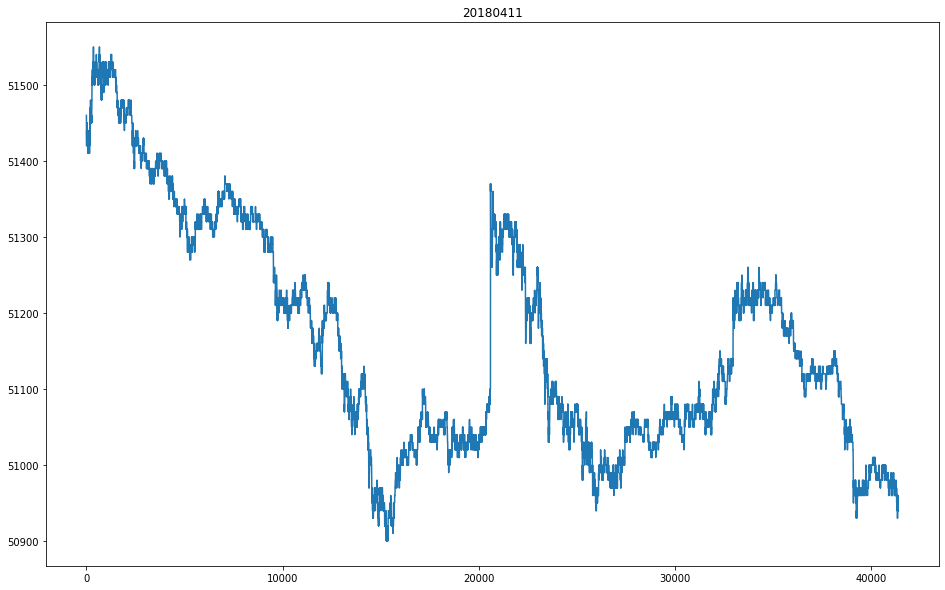

In [25]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["price"][range_].values);

- add time

- plot price change

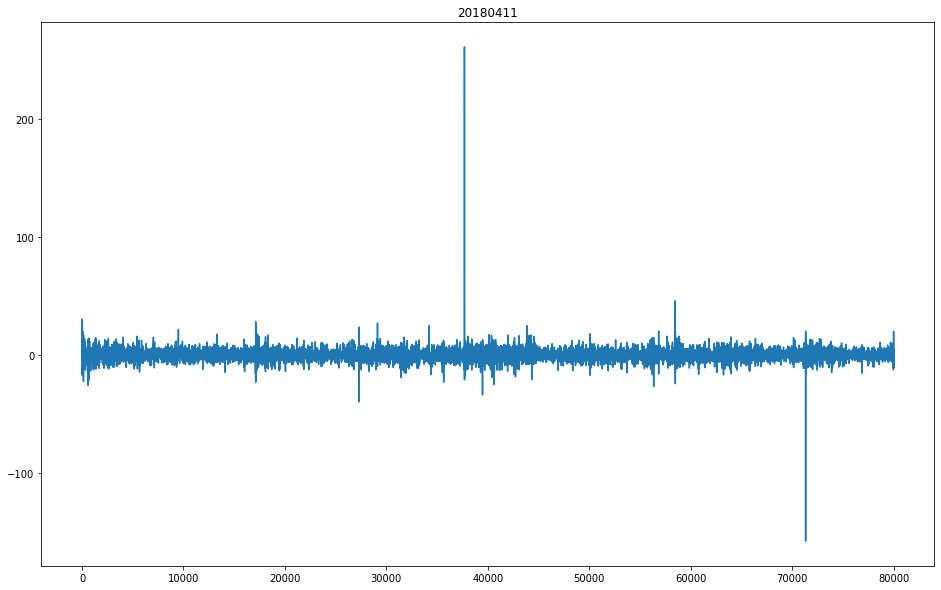

In [26]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);

- plot price log return

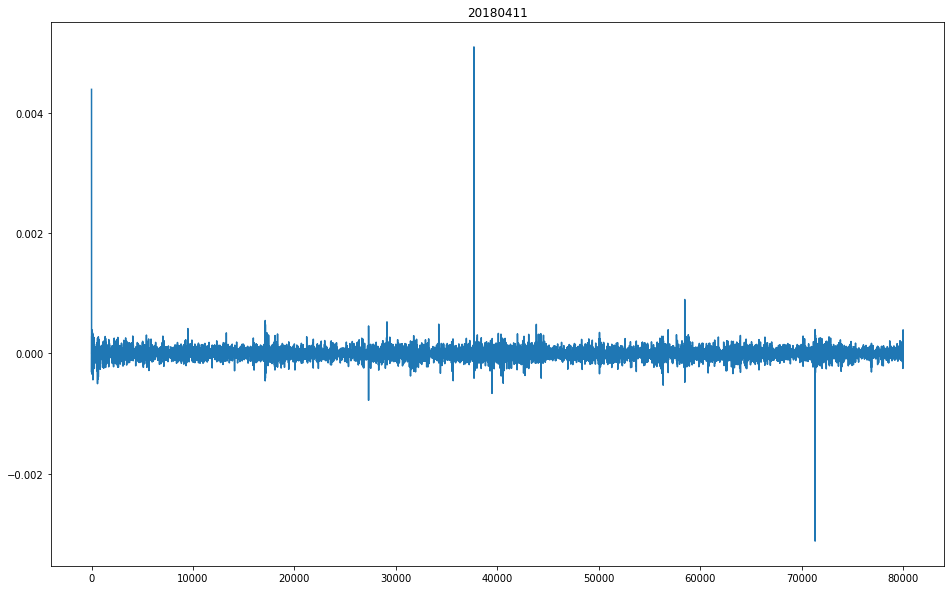

In [27]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["ret"].values);

- count the number of rising ticks

In [28]:
sum(data['ret']>0)/len(data)
## 0.4230591352824269

0.4230591352824269

- count the number of falling ticks

In [29]:
sum(data['ret']<0)/len(data)
## 0.4089721635438671

0.4089721635438671

In [30]:
sum(data['ret']==0)/len(data)
## 0.167968701173706

0.167968701173706

- count the number of total ticks

In [31]:
len(data)
## 80003

80003

- formula to calculate wpr:

In [32]:
wpr = (data["bid"]*data["ask.qty"]+data["ask"]*data["bid.qty"])/(data["bid.qty"]+data["ask.qty"])

- upper limit or lower limit

In [33]:
limit = (data["ask.qty"]==0) | (data["bid.qty"]==0)

- in this case, one of bid and ask price is zero, so using newest price as wpr

In [34]:
wpr[limit] = data["price"][limit]

In [35]:
wpr.head()

# 0    51395.000000
# 1    51380.769231
# 2    51410.952381
# 3    51404.166667
# 4    51418.461538
# dtype: float64

0    51395.000000
1    51380.769231
2    51410.952381
3    51404.166667
4    51418.461538
dtype: float64

In [36]:
data["wpr"].head()

# 0    51395.000000
# 1    51380.769231
# 2    51410.952381
# 3    51404.166667
# 4    51418.461538
# Name: wpr, dtype: float64

0    51395.000000
1    51380.769231
2    51410.952381
3    51404.166667
4    51418.461538
Name: wpr, dtype: float64

In [37]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

- stationary test for return series

- load related package

In [40]:
import statsmodels.tsa.stattools as ts

In [41]:
result = ts.adfuller(data["ret"][data["good"]], maxlag=int(pow(len(data["ret"][data["good"]])-1,(1/3))), regression='ct', autolag=None)
result

# (-35.50214004892649,
#  0.0,
#  34,
#  41343,
#  {'1%': -3.9589889920347305,
#   '5%': -3.4105961998062146,
#   '10%': -3.127112542509024})

## for this test the smaller the value the more stationary it is
## so it's stationary

(-35.502140122077535,
 0.0,
 34,
 41343,
 {'1%': -3.9589889920347305,
  '5%': -3.4105961998062146,
  '10%': -3.127112542509024})

In [42]:
result = ts.kpss(data["ret"][data["good"]], regression='c', nlags=int(3*math.sqrt(len(data["ret"][data["good"]]))/13))
result

# (0.07973469311110484,
#  0.1,
#  46,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

    ## for KPSS test, small value means level stationary, large value means trend
    ## its p-value is 0.1 so it's stationary

/home/jackie/anaconda3/envs/rbsys/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.07973469311110482,
 0.1,
 46,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [43]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [44]:
sum(data["ret"][0:120])
## 0.00569024841933974

0.00569024841933974

In [45]:
ret_120.iloc[0]
## 0.00569024841933974

0.0056902484193397385

- plot the price movements of 120 ticks

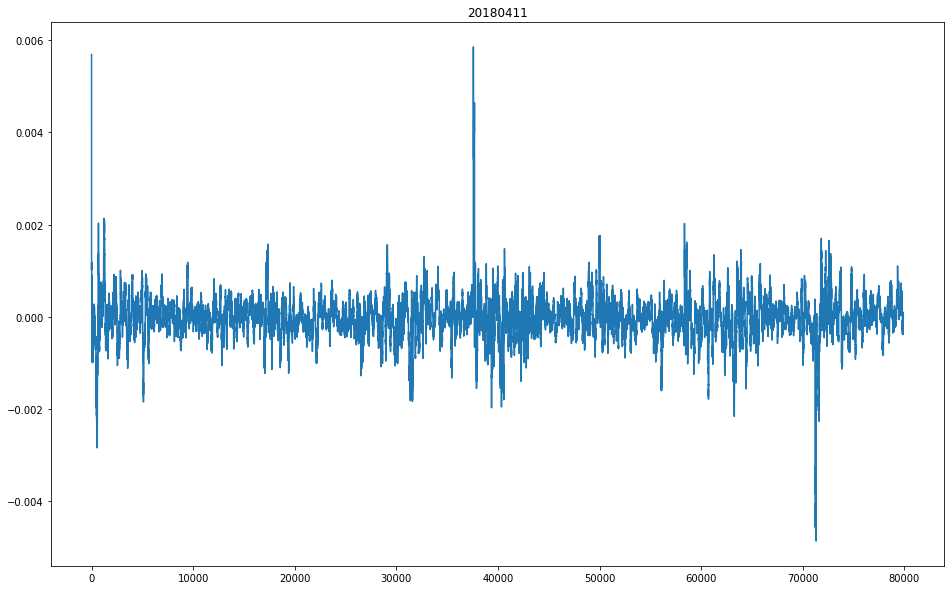

In [46]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

In [47]:
len(ret_120)
## 79884

79884

In [48]:
len(data)
## 80003

80003

In [49]:
range_120 = ((np.mod(np.arange(0, len(data)),120)==0) & data["good"])[119:]

In [50]:
len(ret_120)
## 79884

79884

In [51]:
ret_120.iloc[np.where(range_120)]

# 17041   -0.000834
# 17161    0.000491
# 17281    0.001106
# 17401   -0.000058
# 17521    0.000122
#            ...   
# 57841   -0.000129
# 57961   -0.000125
# 58081   -0.000139
# 58201   -0.000009
# 58321   -0.000570
# Name: ret, Length: 345, dtype: float64

17041   -0.000834
17161    0.000491
17281    0.001106
17401   -0.000058
17521    0.000122
           ...   
57841   -0.000129
57961   -0.000125
58081   -0.000139
58201   -0.000009
58321   -0.000570
Name: ret, Length: 345, dtype: float64

- test whether ret.120 is stationary

In [52]:
result = ts.adfuller(ret_120.iloc[np.where(range_120)], maxlag=int(pow(len(ret_120.iloc[np.where(range_120)])-1,(1/3))), regression='ct', autolag=None)
result

# (-6.200602635837628,
#  8.240974225935623e-07,
#  7,
#  337,
#  {'1%': -3.9858876182413634,
#   '5%': -3.423598642683739,
#   '10%': -3.134757548798489})

(-6.200602635942935,
 8.24097422165303e-07,
 7,
 337,
 {'1%': -3.9858876182413634,
  '5%': -3.423598642683739,
  '10%': -3.134757548798489})

In [53]:
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c', nlags=int(3*math.sqrt(len(ret_120.iloc[np.where(range_120)]))/13))
result

# (0.08701611919330896,
#  0.1,
#  4,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's still stationary

/home/jackie/anaconda3/envs/rbsys/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.08701611919331524,
 0.1,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [54]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

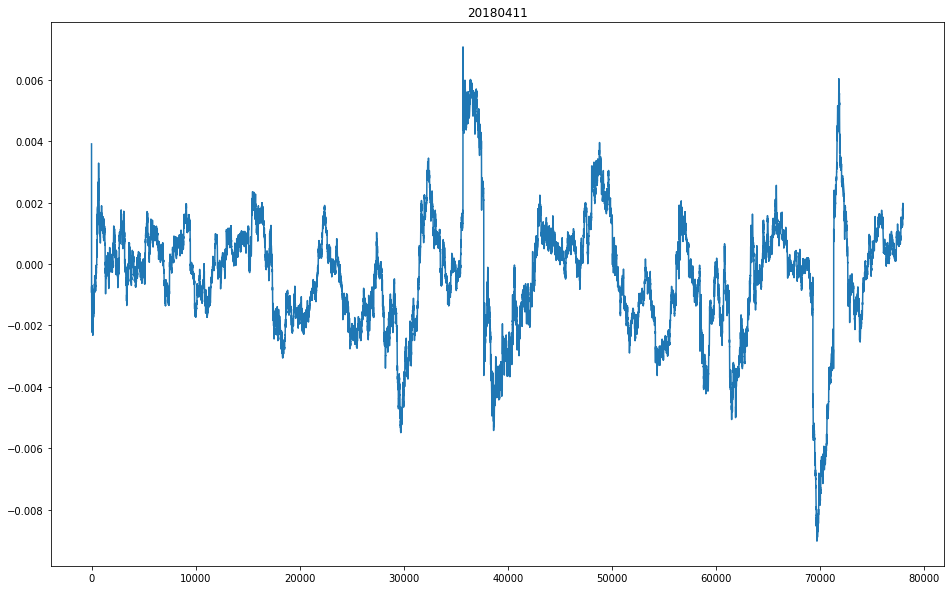

In [55]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [56]:
sum((np.mod(np.arange(1, len(data)+1),2000)==0) & (data["good"]))
## 21

21

- So there are too few points to test for stationary

In [57]:
import pandas as pd
import _pickle as cPickle
import gzip

In [58]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

- there may be too few data
- we can check for more days

In [59]:
def get_sample_ret(date, period):
    data = load(DATA_PATH + product+"/"+date)
    ret = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    range = ((np.mod(np.arange(0, len(data)),period)==0) & data["good"])[(period-1):]
    return ret.iloc[np.where(range)]


In [61]:
import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [62]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)
;

# Wall time: 1min 32s

CPU times: user 1.7 s, sys: 146 ms, total: 1.84 s
Wall time: 12.2 s


''

In [63]:
from itertools import chain 

In [64]:
ret_long = list(chain.from_iterable(result)) 

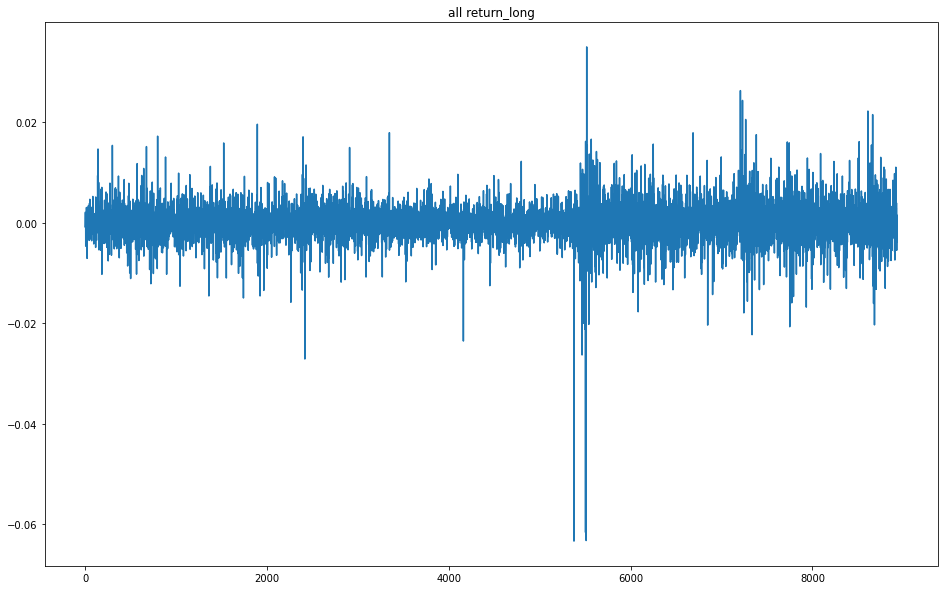

In [65]:
plt.figure(1, figsize=(16, 10))
plt.title("all return_long")
plt.plot(ret_long);

In [66]:
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1,(1/3))), regression='ct', autolag=None)
result

# (-19.928278621936204,
#  0.0,
#  20,
#  8910,
#  {'1%': -3.9597864188846525,
#   '5%': -3.410982863604148,
#   '10%': -3.127340240269156})

# ## it's still stationary

(-19.928278622567653,
 0.0,
 20,
 8910,
 {'1%': -3.9597864188846525,
  '5%': -3.410982863604148,
  '10%': -3.127340240269156})

In [67]:
result = ts.kpss(ret_long, regression='c', nlags=int(3*math.sqrt(len(ret_long))/13))
result

# (0.18684229755043372,
#  0.1,
#  21,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# ## p-value is 0.1 so it's stationary

/home/jackie/anaconda3/envs/rbsys/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.18684229755043374,
 0.1,
 21,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, it's still stationary for 4096 ticks


- check simple strategy


- set triger threshold

In [68]:
threshold = 0.001
len(ret_long)
# 8931

8931


- make up the return series to match uo with original data

- plot price series

- number of ticks above the threshold, to be long position

In [69]:
sum(np.array(ret_long)>threshold)
## 3096

3096

- number of ticks below negetive threshold, to be short position

In [70]:
sum(np.array(ret_long)< -threshold)
## 2921

2921

- set position


- number of ticks

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [71]:
## backtest method: signal value decides position
from collections import OrderedDict
def get_daily_pnl_fast(date, product="rb", period=4096, tranct_ratio=False, threshold=0.001, tranct=0.21, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    ori_data = cPickle.loads(raw_data) ## original data
    data=ori_data[ori_data["good"]] ## the middle day of original data
    n_bar = len(data)  ## number of bars
    unit = np.std(data["ret"]) ## standard deviation of return
    np.random.seed(10)
    ##  we repeat the above code to get daily result
    ret_long = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True) ## future return, used as signal
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long>threshold) & (np.array(data["next.ask"])>0)] = 1 ## signal>thre, position =1
    signal[(ret_long< -threshold) & (np.array(data["next.bid"])>0)] = -1 ## signal< -thre, position = -1
    position=signal
    position[0]=0
    position[n_bar-1] = 0 ## close position before the end of day
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = np.array(change_pos>0)
    change_sell = np.array(change_pos<0)
    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct) ## buy price, use next ask, tranct cost use notional*ratio
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct) ## sell price use next bid
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct ## fix tranct cost per share
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we try one day as an example

In [72]:
import dask
from dask import compute, delayed

get_daily_pnl_fast(all_dates[0], product="cu", period=4096, tranct_ratio=True, threshold=0.001, tranct=1.1e-4)

# OrderedDict([('date', '20170703.pkl'),
#              ('final.pnl', -1908.7881000004854),
#              ('turnover', 11261710.0737),
#              ('num', 119),
#              ('hld.period', 21545)])

OrderedDict([('date', '20170703.pkl'),
             ('final.pnl', -1908.7881000004854),
             ('turnover', 11261710.0737),
             ('num', 119),
             ('hld.period', 21545)])

- Then we use it for all days

In [73]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="cu", period=4096, tranct_ratio=True, threshold=0.001, tranct=1.1e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 2min 10s

CPU times: user 2.39 s, sys: 140 ms, total: 2.53 s
Wall time: 14.9 s


- Now we can use a function to check its performance

In [74]:
from collections import OrderedDict
def get_performance(result, spread=1):
    aa = pd.DataFrame(result)
    aa.set_index("date", inplace=True)
    col_names = aa.columns
    row_names = aa.index
    stat = aa.values
    stat = np.array(np.rec.fromrecords(aa.values))
    np_names = aa.dtypes.index.tolist()
    stat.dtype.names = tuple([name for name in np_names])
    stat = pd.DataFrame(stat)
    pnl = stat["final.pnl"].cumsum()
    date_str = [n[0:8] for n in row_names]
    date_format = [pd.to_datetime(d) for d in date_str]
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(date_format, pnl)
    n_days = len(stat)
    num = stat["num"].mean()
    if num==0:
        return;
    if (stat["final.pnl"].std()==0):
        sharpe = 0
    else:
        sharpe = stat["final.pnl"].mean()/stat["final.pnl"].std()*math.sqrt(250)
    drawdown = max(pnl.cummax()-pnl)/pnl.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(stat["final.pnl"]>0)/n_days
   
    avg_pnl = sum(stat["final.pnl"])/sum(stat["num"])/spread
    hld_period = sum(stat["hld.period"])/sum(stat["num"])
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-1.821352,-1.109242,-0.901517,0.149393,136.223156,-29.325422,148.463744


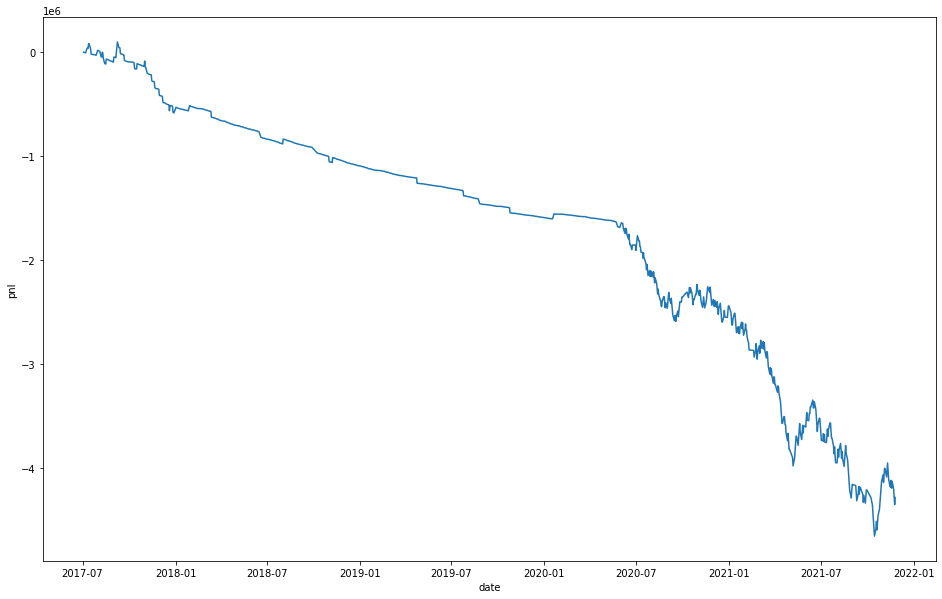

In [75]:
pd.DataFrame(get_performance(result, 1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-1.821352 	-1.109242 	-0.901517 	0.149393 	136.223156 	-29.325422 	148.463744




- we can see it's really bad
- we can try increasing threshold

In [76]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="cu", period=4096, tranct_ratio=True, threshold=0.01, tranct=1.1e-4, noise=0)
    result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 42.4 s


CPU times: user 2.41 s, sys: 123 ms, total: 2.53 s
Wall time: 14.8 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-0.068428,-5.737118,-0.174304,0.058824,5.082166,-11.447947,86.491824


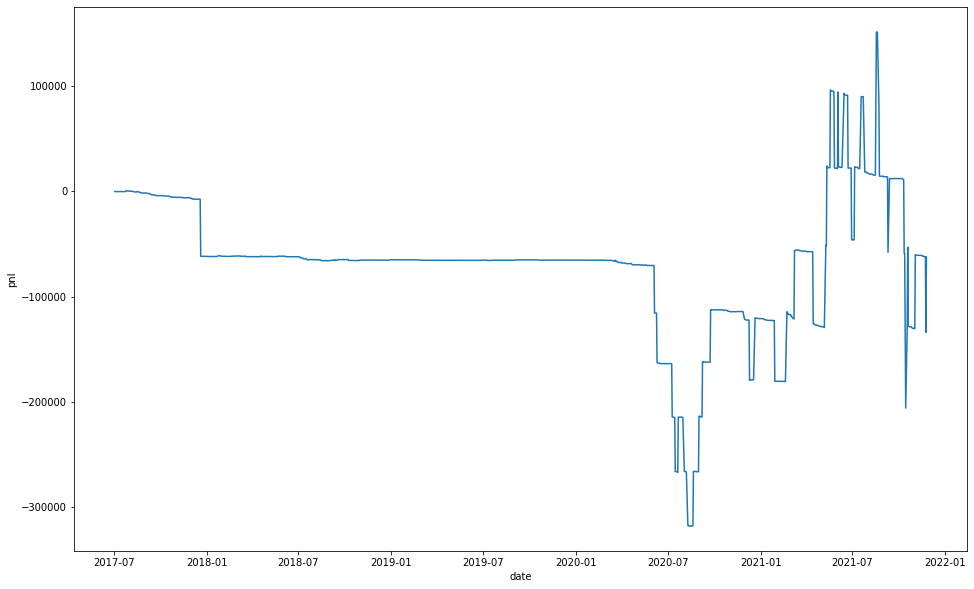

In [77]:
pd.DataFrame(get_performance(result_2), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-0.068428 	-5.737118 	-0.174304 	0.058824 	5.082166 	-11.447947 	86.491824

In [78]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="cu", period=4096, tranct_ratio=True, threshold=0.02, tranct=1.1e-4, noise=0)
    result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 40.5 s

CPU times: user 2.45 s, sys: 151 ms, total: 2.6 s
Wall time: 14.9 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,0.270429,1.032164,0.968838,0.005602,0.193277,347.617771,75.922705


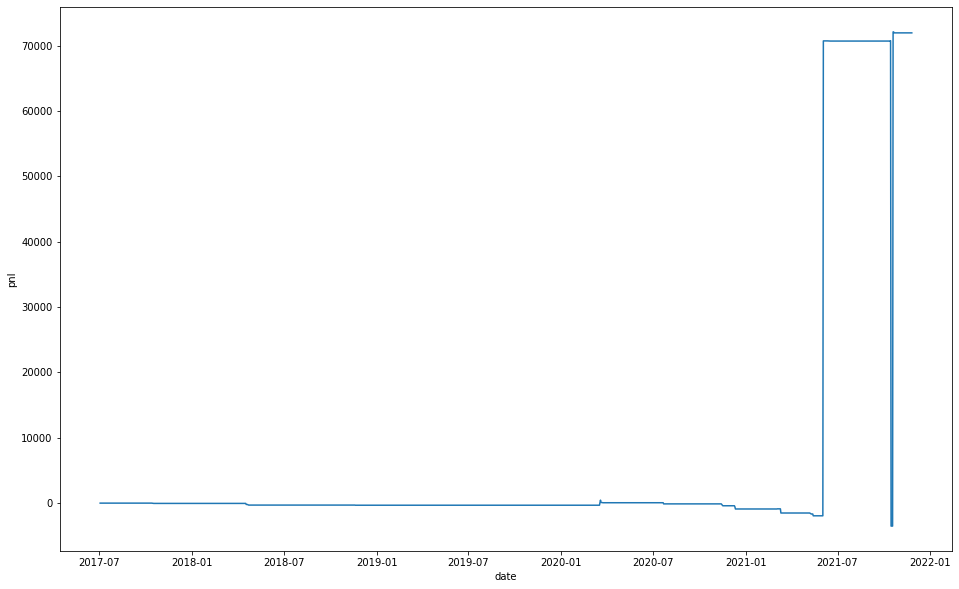

In [79]:
pd.DataFrame(get_performance(result_3, 1), index=[0])

# 	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	0.270429 	1.032164 	0.968838 	0.005602 	0.193277 	347.617771 	75.922705

- Although it's profitable there are very few trades.
- Now we use a different scheme.
- In previous scheme, we close our position when the value is not strong enough.
- It may close the positions too soon that it cannot cover transaction cost on average
- So we change our backtest method to make it holding positions longer

In [80]:
## backtest use good method
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, tranct_ratio=False, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    data = data[data["good"]].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1 #
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1## if signal==1, position_pos=1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0  ## if ret< -threshold, position_pos=0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1 ## if signal==-1, position_neg=-1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0 ## if ret> threshold, position_neg=0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg ## total position
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [81]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="cu", period=4096, tranct_ratio=True, threshold=0.001, tranct=1.1e-4, noise=0)
    result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 49.8 s

CPU times: user 2.19 s, sys: 125 ms, total: 2.32 s
Wall time: 18.1 s


- the col names and row names are opposite

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,21.984712,0.00014,7135.673819,0.998133,8.730159,112.253078,3904.90738


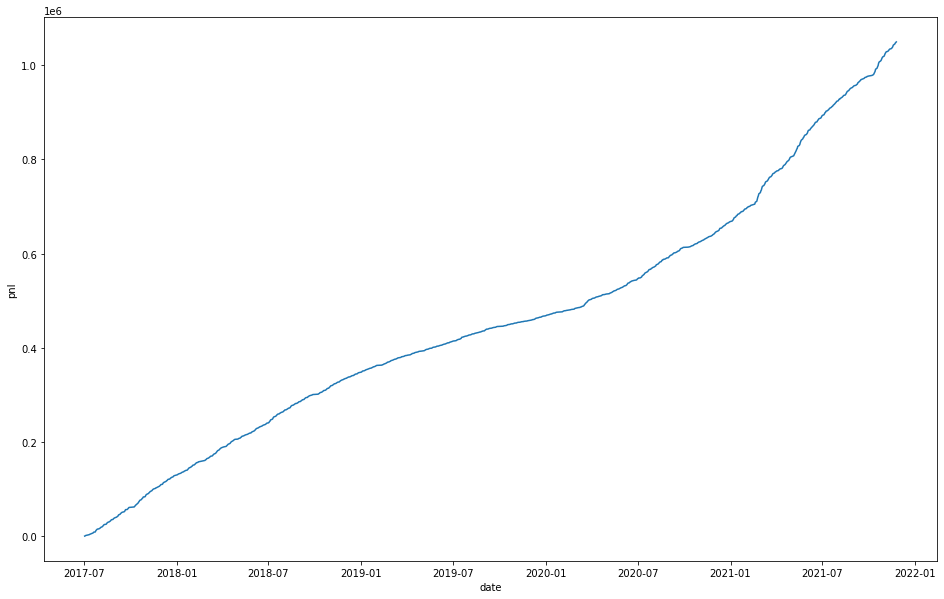

In [82]:
pd.DataFrame(get_performance(result_4,1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	21.984712 	0.00014 	7135.673819 	0.998133 	8.730159 	112.253078 	3904.90738


- we can see it's much better than before.
- Keep in mind that it uses future data here so the result is not realistic
- we just want to show that this scheme is much better than the previous one
- and we would use this backtest method in the future course

In [83]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="cu", period=4096, tranct_ratio=True, threshold=0.002, tranct=1.1e-4, noise=5)
    result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 50.8 s

CPU times: user 2.27 s, sys: 143 ms, total: 2.41 s
Wall time: 18.1 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,7.379076,0.075132,13.309852,0.991597,11.35014,82.128554,2958.209691


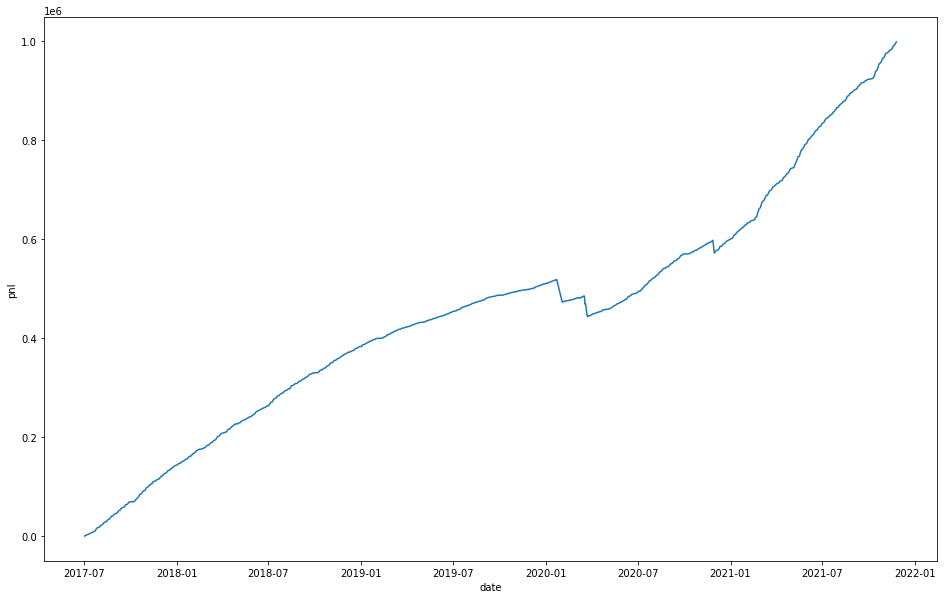

In [84]:
pd.DataFrame(get_performance(result_5,1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	7.379076 	0.075132 	13.309852 	0.991597 	11.35014 	82.128554 	2958.209691



- Previous method use fix size to trade, 
- now we suppose fix notional value of each trade

In [85]:
## daily pnl of fixed capital
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, tranct_ratio=False,threshold=0.001, tranct=1.1e-4, noise=0, notional=False):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    data = data[data["good"]].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    pre_pos = position_pos.shift(1)
    position_pos[(position_pos==1) & (pre_pos==1)] = np.nan ## holding positio rather than trade, change to nan
    position_pos[(position_pos==1)] = 1/data["next.ask"][(position_pos==1)] ## use 1/price as trading volume
    position_pos.ffill(inplace=True) 
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    pre_neg = position_neg.shift(1)
    position_neg[(position_neg==-1) & (pre_neg==-1)] = np.nan  ## holding positio rather than trade, change to nan
    position_neg[(position_neg==-1)] = -1/data["next.bid"][(position_neg==-1)] ## use 1/price as trading volume
    position_neg.ffill(inplace=True) ## replace nan by trading volume
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0

    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

In [86]:
get_daily_pnl(all_dates[0], product="cu", period=4096, tranct_ratio=True, threshold=0.001, tranct=1.1e-4, notional=True)

# OrderedDict([('date', '20170703.pkl'),
#              ('final.pnl', 0.005439628092068327),
#              ('turnover', 11.997468774189912),
#              ('num', 6),
#              ('hld.period', 33301)])

OrderedDict([('date', '20170703.pkl'),
             ('final.pnl', 0.005439628092068327),
             ('turnover', 11.997468774189912),
             ('num', 6),
             ('hld.period', 33301)])

In [87]:
 %%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="cu", period=4096, tranct_ratio=True, 
                              threshold=0.001, tranct=1.1e-4, noise=0, notional=True)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 55.6 s

CPU times: user 2.32 s, sys: 118 ms, total: 2.44 s
Wall time: 18.7 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,26.197689,0.000112,8968.268366,0.998133,8.730159,0.002028,3904.90738


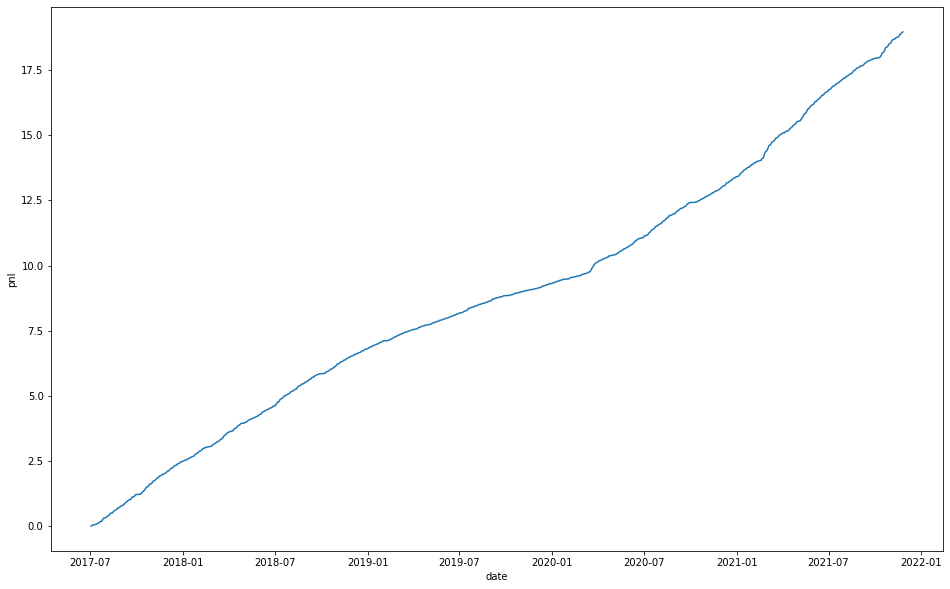

In [88]:
pd.DataFrame(get_performance(result,1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	26.197689 	0.000112 	8968.268366 	0.998133 	8.730159 	0.002028 	3904.90738

- After adding some noise, the result is worse than before but still pretty good
- the later courses we would use this backtest method to test our signals and straregies without any future data
- the reuslt would be much worse than the previous ones but they are realistic
- Homework
- You can try this method on other products and comapre their results